<a href="https://colab.research.google.com/github/GildoFilhoAntonio/ProcessMining/blob/main/PM4PY_Alinhamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pm4py -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import pm4py

from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter

from pm4py.algo.conformance.tokenreplay import algorithm as token_replay # Import the token_replay algorithm

from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from IPython.display import Image

from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils.petri_utils import add_arc_from_to
from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.petri_net import visualizer as pn_visualizer



In [ ]:
df_alinhamento = pd.read_csv("/content/drive/MyDrive/Mestrado/dados/resultados_alinhamento_final3.csv")
df_alinhamento

,alignment,cost,visited_states,queued_states,traversed_arcs,lp_solved,fitness,bwc
0,"[('semestre01', 'semestre01'), ('QXD0005', 'QX...",540000,61876,248100,406965,230171,0.662500,1600000
1,"[('semestre01', 'semestre01'), ('QXD0005', 'QX...",680000,197,775,1001,176,0.276596,940000
2,"[('semestre01', 'semestre01'), ('QXD0005', 'QX...",780000,28540,107218,190978,79846,0.350000,1200000
3,"[('semestre01', 'semestre01'), ('QXD0005', 'QX...",1050000,112206,456196,730809,423896,0.438503,1870000
4,"[('semestre01', 'semestre01'), ('QXD0005', 'QX...",780000,18180,75133,120706,54060,0.370968,1240000
...,...,...,...,...,...,...,...,...
109,"[('semestre01', 'semestre01'), ('QXD0005', 'QX...",170000,18434,82307,125756,70179,0.890323,1550000
110,"[('semestre01', 'semestre01'), ('QXD0005', 'QX...",660000,111,577,618,70,0.297872,940000
111,"[('semestre01', 'semestre01'), ('QXD0005', 'QX...",10000,75,586,586,1,0.993289,1490000
112,"[('semestre01', 'semestre01'), ('QXD0005', 'QX...",520000,3896,21745,28568,13108,0.648649,1480000


In [ ]:
# Reimportar bibliotecas e recarregar o arquivo após reset
import pandas as pd
import ast

# Extrair eventos do log a partir do campo 'alignment'
df_alinhamento["eventos_log"] = df_alinhamento["alignment"].apply(lambda x: [i[0] for i in ast.literal_eval(x)])

# Separar os grupos com base na presença do evento "formado"
grupo1_formados = df_alinhamento[df_alinhamento["eventos_log"].apply(lambda eventos: "formado" in eventos)]
grupo2_nao_formados = df_alinhamento[df_alinhamento["eventos_log"].apply(lambda eventos: "formado" not in eventos)]

# Adicionar uma nova coluna 'id_discente' com base no índice original do DataFrame
grupo1_formados = grupo1_formados.copy()
grupo1_formados["id_discente"] = grupo1_formados.index

# Adicionar uma nova coluna 'id_discente' com base no índice original do DataFrame
grupo2_nao_formados = grupo2_nao_formados.copy()
grupo2_nao_formados["id_discente"] = grupo2_nao_formados.index


# Exibir o grupo 1 para o usuário
#grupo1_formados
#grupo2_nao_formados


In [ ]:
# Exportar o DataFrame para CSV
grupo1_formados.to_csv("/content/drive/MyDrive/Mestrado/dados/grupo1_formados.csv", index=False)
grupo2_nao_formados.to_csv("/content/drive/MyDrive/Mestrado/dados/grupo2_nao_formados.csv", index=False)

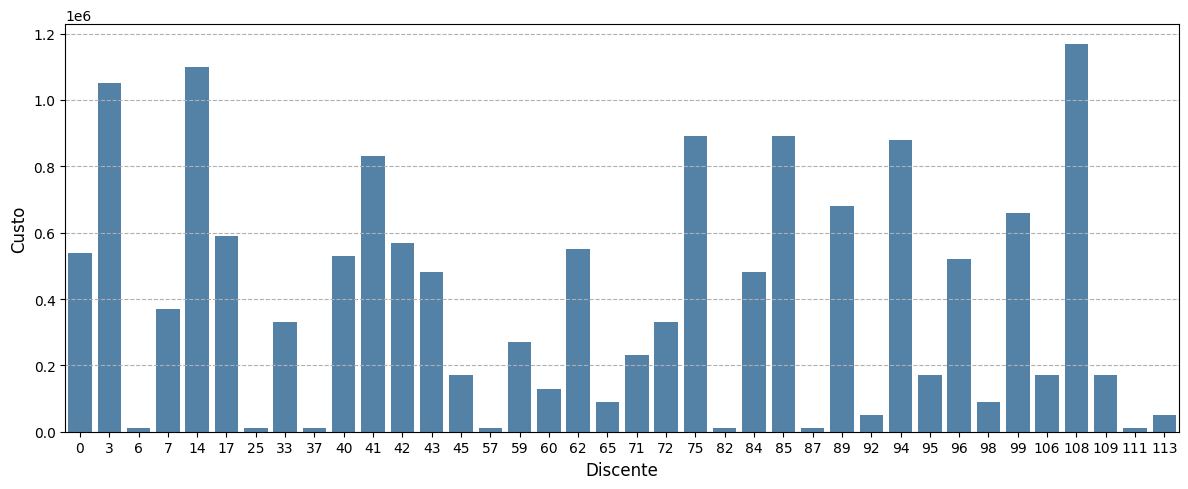

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados (ajuste o caminho se necessário)
df_grupo1 = pd.read_csv('/content/drive/MyDrive/Mestrado/dados/grupo1_formados.csv')

# Garantir que 'cost' e 'id_discente' estejam no tipo correto
df_grupo1['cost'] = pd.to_numeric(df_grupo1['cost'], errors='coerce')
df_grupo1['id_discente'] = pd.to_numeric(df_grupo1['id_discente'], errors='coerce')

# Plotar gráfico de barras com cor única
plt.figure(figsize=(12, 5))
sns.barplot(data=df_grupo1, x='id_discente', y='cost', color='steelblue')
#plt.title('Custo de Alinhamento por ID do Discente')
plt.xlabel('Discente', fontsize = "12")
plt.ylabel('Custo', fontsize = "12")

# Adicionar linhas de grade horizontais
plt.grid(True, axis='y', linestyle='--', alpha=1.0)

plt.tight_layout()

#caminho_pdf =
#plt.savefig("custo_por_discente.pdf", format='pdf')
#plt.close()

#caminho_pdf
plt.show()


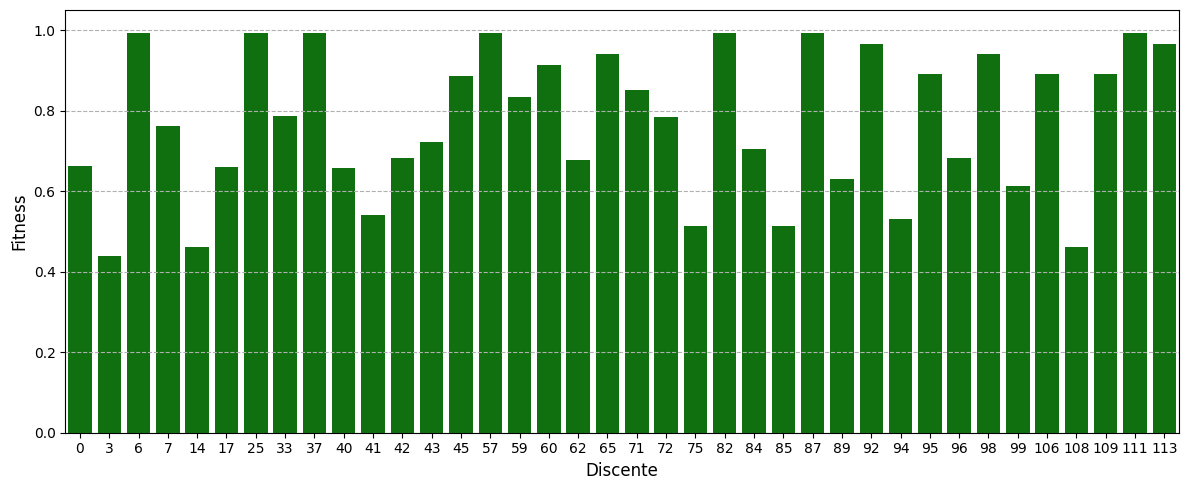

In [ ]:
# Garantir que os dados estejam no tipo correto
df_grupo1['fitness'] = pd.to_numeric(df_grupo1['fitness'], errors='coerce')
df_grupo1['id_discente'] = pd.to_numeric(df_grupo1['id_discente'], errors='coerce')

# Criar o gráfico de barras do fitness
plt.figure(figsize=(12, 5))
sns.barplot(data=df_grupo1, x='id_discente', y='fitness', color='green')
#plt.title('Fitness por Discente')
plt.xlabel('Discente', fontsize = "12")
plt.ylabel('Fitness', fontsize = "12")
plt.ylim(0, 1.05)  # Limite do eixo y para o intervalo [0, 1]

# Adicionar linhas de grade horizontais
plt.grid(True, axis='y', linestyle='--', alpha=1.0)

plt.tight_layout()

#caminho_pdf =
#plt.savefig("fitness_por_discente.pdf", format='pdf')
#plt.close()

#caminho_pdf
plt.show()

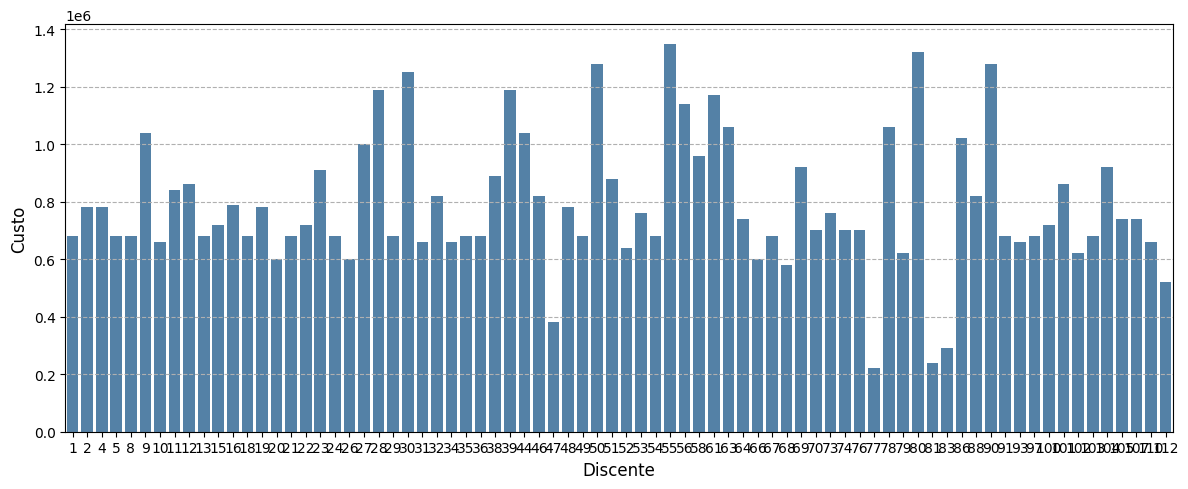

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados (ajuste o caminho se necessário)
df_grupo1 = pd.read_csv('/content/drive/MyDrive/Mestrado/dados/grupo2_nao_formados.csv')

# Garantir que 'cost' e 'id_discente' estejam no tipo correto
df_grupo1['cost'] = pd.to_numeric(df_grupo1['cost'], errors='coerce')
df_grupo1['id_discente'] = pd.to_numeric(df_grupo1['id_discente'], errors='coerce')

# Plotar gráfico de barras com cor única
plt.figure(figsize=(12, 5))
sns.barplot(data=df_grupo1, x='id_discente', y='cost', color='steelblue')
#plt.title('Custo de Alinhamento por ID do Discente')
plt.xlabel('Discente', fontsize = "12")
plt.ylabel('Custo', fontsize = "12")

# Adicionar linhas de grade horizontais
plt.grid(True, axis='y', linestyle='--', alpha=1.0)

plt.tight_layout()

#caminho_pdf =
#plt.savefig("custo_por_discente_nao_formado.pdf", format='pdf')
#plt.close()

#caminho_pdf
plt.show()


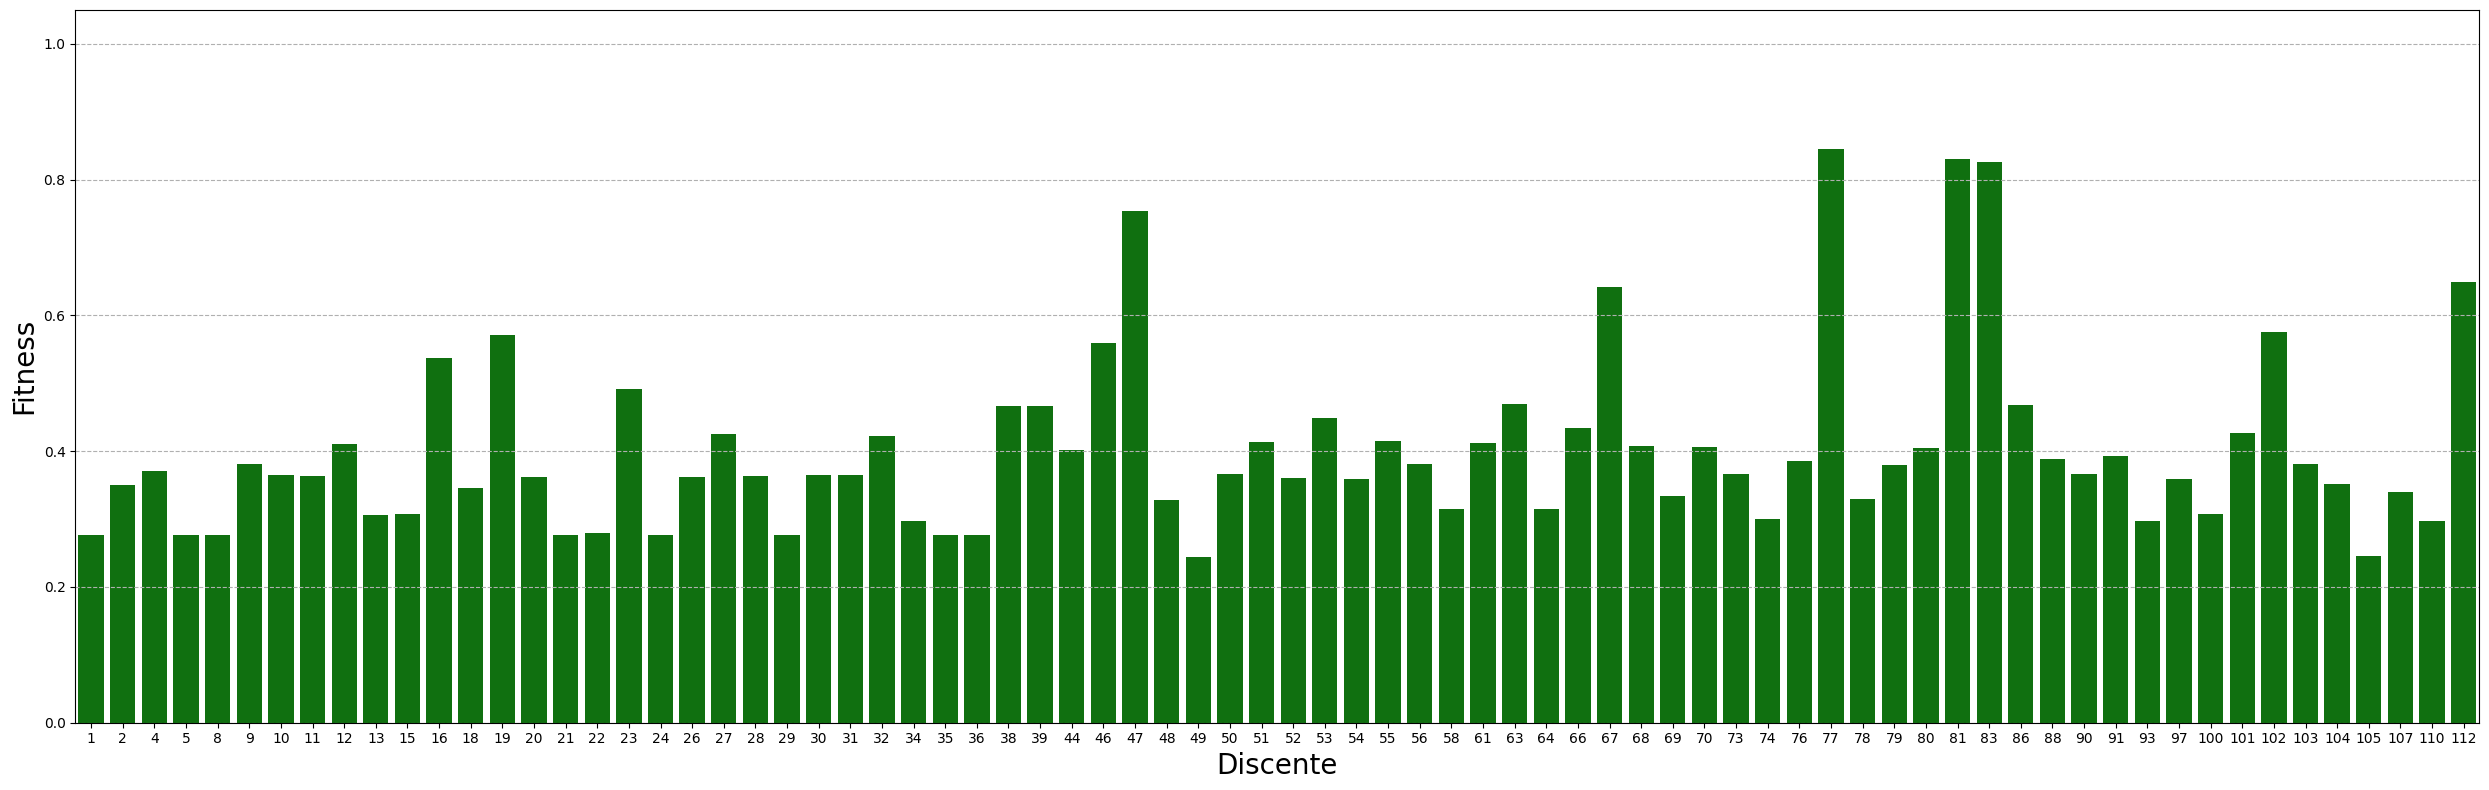

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que os dados estejam no tipo correto
df_grupo1['fitness'] = pd.to_numeric(df_grupo1['fitness'], errors='coerce')
df_grupo1['id_discente'] = pd.to_numeric(df_grupo1['id_discente'], errors='coerce')

# Criar o gráfico de barras do fitness
plt.figure(figsize=(25, 8))
sns.barplot(data=df_grupo1, x='id_discente', y='fitness', color='green')
#plt.title('Fitness por Discente')
plt.xlabel('Discente', fontsize = "20")
plt.ylabel('Fitness', fontsize = "20")
plt.ylim(0, 1.05)  # Limite do eixo y para o intervalo [0, 1]

# Adicionar linhas de grade horizontais
plt.grid(True, axis='y', linestyle='--', alpha=1.0)

plt.tight_layout()

#caminho_pdf =
#plt.savefig("fitness_por_discente_nao_formado.pdf", format='pdf')
#plt.close()

#caminho_pdf
plt.show()


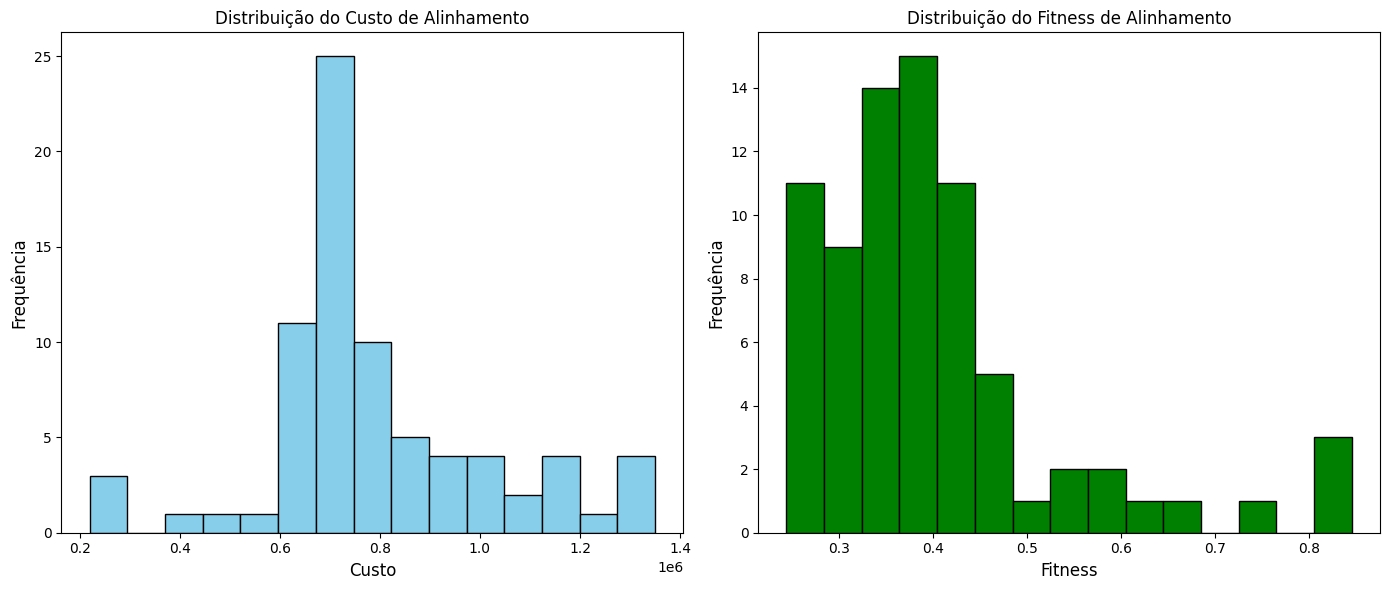

In [ ]:
# Criar a figura com dois subplots lado a lado usando os nomes corretos das colunas
df = pd.read_csv('/content/drive/MyDrive/Mestrado/dados/grupo2_nao_formados.csv')

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histograma do custo
axs[0].hist(df['cost'], bins=15, color='skyblue', edgecolor='black')
axs[0].set_title('Distribuição do Custo de Alinhamento')
axs[0].set_xlabel('Custo', fontsize = "12")
axs[0].set_ylabel('Frequência', fontsize = "12")

# Histograma do fitness
axs[1].hist(df['fitness'], bins=15, color='green', edgecolor='black')
axs[1].set_title('Distribuição do Fitness de Alinhamento')
axs[1].set_xlabel('Fitness', fontsize = "12")
axs[1].set_ylabel('Frequência', fontsize = "12")

plt.tight_layout()

#caminho_pdf =
#plt.savefig("custo_fitness_por_discente_nao_formado.pdf", format='pdf')
#plt.close()

plt.show()


# Alunos não formados

In [ ]:
import pandas as pd
import ast


# Extrair eventos do log a partir do campo 'alignment'
df_alinhamento["eventos_log"] = df_alinhamento["alignment"].apply(lambda x: [i[0] for i in ast.literal_eval(x)])

# Separar grupo dos não formados
grupo2_nao_formados = df_alinhamento[df_alinhamento["eventos_log"].apply(lambda eventos: "formado" not in eventos)].copy()
grupo2_nao_formados["id_discente"] = grupo2_nao_formados.index

# Dicionário de semestres
semestres = {
    "SEMESTRE 01": ["SEMESTRE 01", "QXD0001", "QXD0108", "QXD0005", "QXD0056", "QXD0109", "QXD0103"],
    "SEMESTRE 02": ["SEMESTRE 02", "QXD0007", "QXD0010", "QXD0013", "QXD0006", "QXD0008"],
    "SEMESTRE 03": ["SEMESTRE 03", "QXD0115", "QXD0017", "QXD0114", "QXD0012", "QXD0040"],
    "SEMESTRE 04": ["SEMESTRE 04", "QXD0011", "QXD0014", "QXD0016", "QXD0041", "QXD0116"],
    "SEMESTRE 05": ["SEMESTRE 05", "QXD0020", "QXD0021", "QXD0025", "QXD0119", "QXD0120"],
    "SEMESTRE 06": ["SEMESTRE 06", "QXD0019", "QXD0037", "QXD0038", "QXD0043", "QXD0046"],
    "SEMESTRE 07": ["SEMESTRE 07", "QXD0029", "QXD0110", "QXD0111", "QXD0104"]
}

disciplina_para_semestre = {
    disciplina: semestre for semestre, disciplinas in semestres.items() for disciplina in disciplinas if disciplina != semestre
}

# Nova função que considera múltiplas tentativas por semestre
def detectar_fora_ordem_todas_tentativas(eventos_log):
    resultado = []
    semestre_atual = None
    eventos_por_semestre = {}

    for evento in eventos_log:
        if evento.startswith("semestre"):
            semestre_atual = evento.upper().replace("SEMESTRE", "SEMESTRE ")
        elif any(suffix in evento for suffix in ["APROVADO", "REPROVADO", "REPFALTA", "TRANCADO", "SUPRIMIDO"]):
            disciplina = evento.split("_")[0]
            if disciplina in disciplina_para_semestre:
                semestre_ideal = disciplina_para_semestre[disciplina]
                if semestre_atual != semestre_ideal:
                    resultado.append((disciplina, semestre_ideal, semestre_atual))
    return resultado

# Aplicar a função
grupo2_nao_formados["disciplinas_fora_ordem_detalhe"] = grupo2_nao_formados["eventos_log"].apply(
    detectar_fora_ordem_todas_tentativas
)

# Montar dataframe final
resultados_detalhados = []
for _, row in grupo2_nao_formados.iterrows():
    id_aluno = row["id_discente"]
    for disc, ideal, real in row["disciplinas_fora_ordem_detalhe"]:
        resultados_detalhados.append((id_aluno, disc, ideal, real))

df_fora_ordem_corrigido = pd.DataFrame(
    resultados_detalhados,
    columns=["id_discente", "Disciplina", "Semestre Ideal", "Semestre Real"]
)

df_fora_ordem_corrigido


,id_discente,Disciplina,Semestre Ideal,Semestre Real
0,2,QXD0005,SEMESTRE 01,SEMESTRE 02
1,2,QXD0029,SEMESTRE 07,SEMESTRE 02
2,2,QXD0001,SEMESTRE 01,SEMESTRE 02
3,2,QXD0038,SEMESTRE 06,SEMESTRE 02
4,2,QXD0109,SEMESTRE 01,SEMESTRE 02
...,...,...,...,...
1112,112,QXD0006,SEMESTRE 02,SEMESTRE 04
1113,112,QXD0040,SEMESTRE 03,SEMESTRE 04
1114,112,QXD0017,SEMESTRE 03,SEMESTRE 05
1115,112,QXD0041,SEMESTRE 04,SEMESTRE 05


In [ ]:
# Função para comparar os números dos semestres
def classificar_deslocamento(ideal, real):
    num_ideal = int(ideal.split()[-1])
    num_real = int(real.split()[-1])
    if num_real < num_ideal:
        return "Adiantado"
    elif num_real > num_ideal:
        return "Atrasado"
    else:
        return "No semestre ideal"  # apenas para controle, se necessário

# Aplicar a função ao DataFrame
df_fora_ordem_corrigido["Tipo Deslocamento"] = df_fora_ordem_corrigido.apply(
    lambda row: classificar_deslocamento(row["Semestre Ideal"], row["Semestre Real"]), axis=1
)

df_fora_ordem_corrigido


,id_discente,Disciplina,Semestre Ideal,Semestre Real,Tipo Deslocamento
0,2,QXD0005,SEMESTRE 01,SEMESTRE 02,Atrasado
1,2,QXD0029,SEMESTRE 07,SEMESTRE 02,Adiantado
2,2,QXD0001,SEMESTRE 01,SEMESTRE 02,Atrasado
3,2,QXD0038,SEMESTRE 06,SEMESTRE 02,Adiantado
4,2,QXD0109,SEMESTRE 01,SEMESTRE 02,Atrasado
...,...,...,...,...,...
1112,112,QXD0006,SEMESTRE 02,SEMESTRE 04,Atrasado
1113,112,QXD0040,SEMESTRE 03,SEMESTRE 04,Atrasado
1114,112,QXD0017,SEMESTRE 03,SEMESTRE 05,Atrasado
1115,112,QXD0041,SEMESTRE 04,SEMESTRE 05,Atrasado


In [ ]:
# Filtrar apenas os registros com "Atrasado"
df_atrasados = df_fora_ordem_corrigido[df_fora_ordem_corrigido["Tipo Deslocamento"] == "Atrasado"]

df_atrasados


,id_discente,Disciplina,Semestre Ideal,Semestre Real,Tipo Deslocamento
0,2,QXD0005,SEMESTRE 01,SEMESTRE 02,Atrasado
2,2,QXD0001,SEMESTRE 01,SEMESTRE 02,Atrasado
4,2,QXD0109,SEMESTRE 01,SEMESTRE 02,Atrasado
5,2,QXD0010,SEMESTRE 02,SEMESTRE 03,Atrasado
6,2,QXD0007,SEMESTRE 02,SEMESTRE 03,Atrasado
...,...,...,...,...,...
1112,112,QXD0006,SEMESTRE 02,SEMESTRE 04,Atrasado
1113,112,QXD0040,SEMESTRE 03,SEMESTRE 04,Atrasado
1114,112,QXD0017,SEMESTRE 03,SEMESTRE 05,Atrasado
1115,112,QXD0041,SEMESTRE 04,SEMESTRE 05,Atrasado


In [ ]:
# Calcular a frequência de disciplinas cursadas fora de ordem (independente do semestre)
df_frequencia_disciplina = df_atrasados["Disciplina"].value_counts().reset_index()
df_frequencia_disciplina.columns = ["Disciplina", "Frequência"]

df_frequencia_disciplina

,Disciplina,Frequência
0,QXD0109,64
1,QXD0008,61
2,QXD0010,57
3,QXD0013,52
4,QXD0007,49
5,QXD0017,44
6,QXD0025,43
7,QXD0006,42
8,QXD0001,40
9,QXD0040,39


<ipython-input-20-00ebc50bcee8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


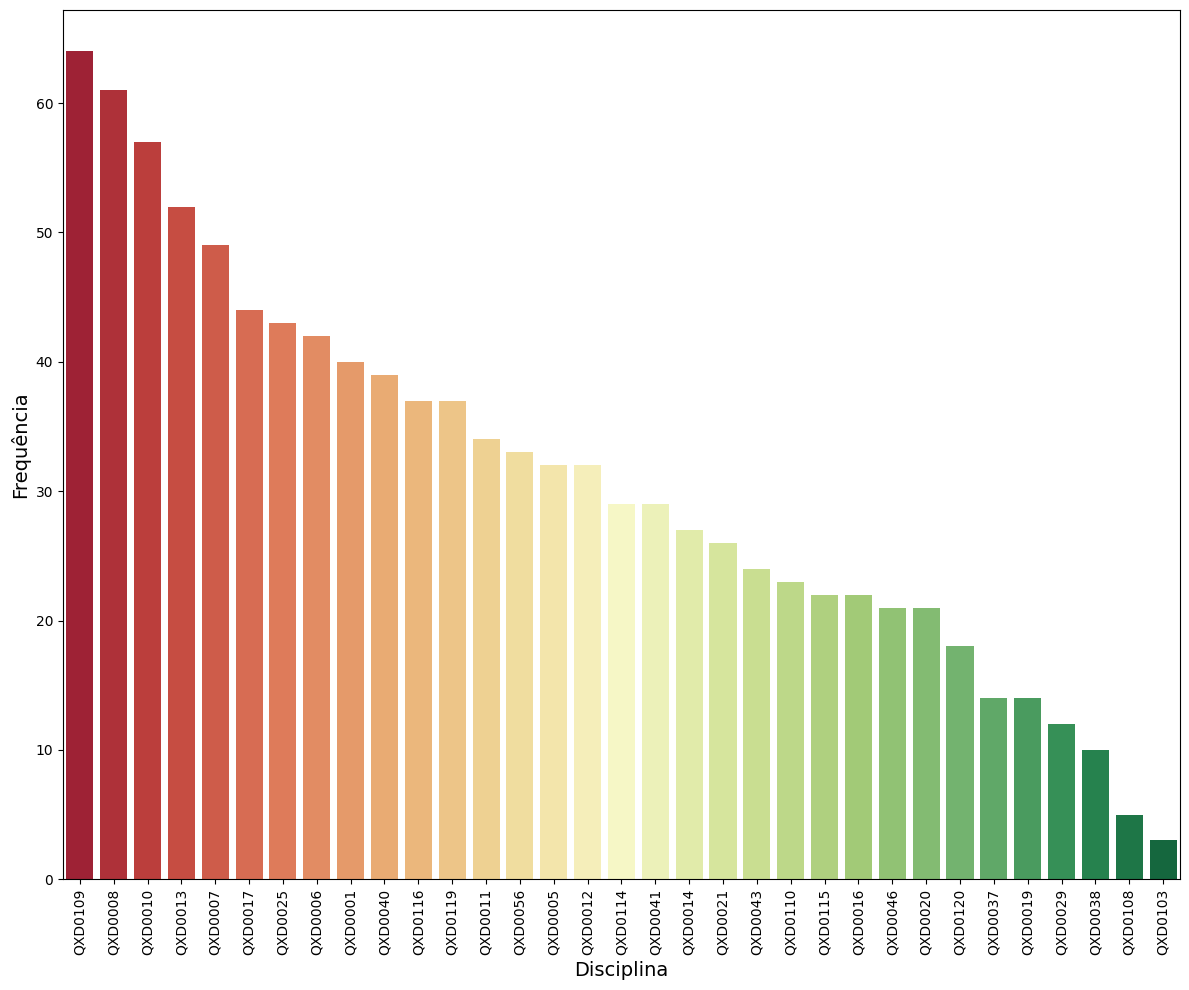

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar por frequência
df_frequencia_disciplina = df_frequencia_disciplina.sort_values(by="Frequência", ascending=False)

# Criar o gráfico de barras verticais
plt.figure(figsize=(12, 10))
barplot = sns.barplot(
    x="Disciplina", y="Frequência", data=df_frequencia_disciplina,
    palette=sns.color_palette("RdYlGn", len(df_frequencia_disciplina))
)
plt.xticks(rotation=90)
plt.xlabel("Disciplina", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
#plt.title("Frequência de Disciplinas Fora de Ordem")
plt.tight_layout()

# Salvar o gráfico
pdf_path = "frequencia_disciplinas_barras_vertical.pdf"
png_path = "frequencia_disciplinas_barras_vertical.png"
plt.savefig(pdf_path)
plt.savefig(png_path, dpi=300)
plt.show()


In [ ]:
# Filtrar apenas os registros com "Atrasado"
df_adiantado = df_fora_ordem_corrigido[df_fora_ordem_corrigido["Tipo Deslocamento"] == "Adiantado"]

df_adiantado

,id_discente,Disciplina,Semestre Ideal,Semestre Real,Tipo Deslocamento
1,2,QXD0029,SEMESTRE 07,SEMESTRE 02,Adiantado
3,2,QXD0038,SEMESTRE 06,SEMESTRE 02,Adiantado
7,2,QXD0021,SEMESTRE 05,SEMESTRE 03,Adiantado
10,4,QXD0011,SEMESTRE 04,SEMESTRE 02,Adiantado
15,4,QXD0038,SEMESTRE 06,SEMESTRE 04,Adiantado
...,...,...,...,...,...
1100,105,QXD0014,SEMESTRE 04,SEMESTRE 03,Adiantado
1101,105,QXD0019,SEMESTRE 06,SEMESTRE 04,Adiantado
1106,107,QXD0038,SEMESTRE 06,SEMESTRE 03,Adiantado
1109,107,QXD0021,SEMESTRE 05,SEMESTRE 03,Adiantado


In [ ]:
# Calcular a frequência de disciplinas cursadas fora de ordem (independente do semestre)
df_frequencia_disciplina_adiantado = df_adiantado["Disciplina"].value_counts().reset_index()
df_frequencia_disciplina_adiantado.columns = ["Disciplina", "Frequência"]

df_frequencia_disciplina_adiantado

,Disciplina,Frequência
0,QXD0029,21
1,QXD0011,16
2,QXD0038,12
3,QXD0021,9
4,QXD0116,7
5,QXD0019,6
6,QXD0020,4
7,QXD0046,3
8,QXD0037,3
9,QXD0119,2


In [ ]:
df_top5_adiantado = df_frequencia_disciplina_adiantado[df_frequencia_disciplina_adiantado["Frequência"]>6]
df_top5_adiantado

,Disciplina,Frequência
0,QXD0029,21
1,QXD0011,16
2,QXD0038,12
3,QXD0021,9
4,QXD0116,7


<ipython-input-25-87ae7c060681>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


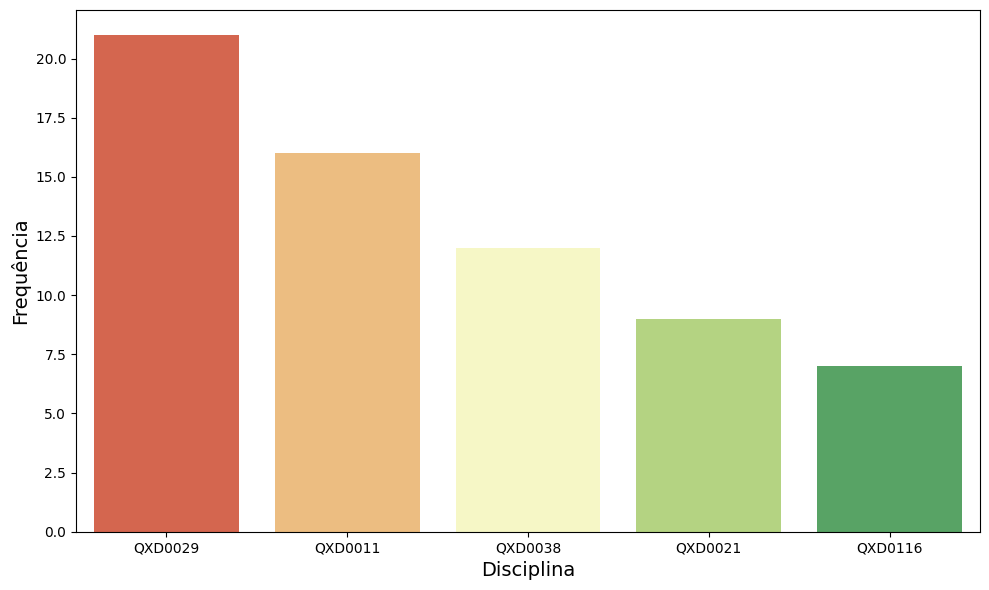

In [ ]:
# Criar gráfico de barras verticais
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Disciplina", y="Frequência", data=df_top5_adiantado,
    palette=sns.color_palette("RdYlGn", len(df_top5_adiantado))
)
plt.xlabel("Disciplina", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
#plt.title("Top 5 Disciplinas Mais Adiantadas", fontsize=14)
plt.tight_layout()

# Salvar o gráfico em PDF e PNG
#pdf_path = "frequencia_disciplinas_adiantadas_top5.pdf"
#png_path = "frequencia_disciplinas_adiantadas_top5.png"

#plt.savefig(pdf_path)
#plt.savefig(png_path, dpi=300)
#plt.close()

#(pdf_path, png_path)
plt.show()

In [ ]:
df_fora_ordem_corrigido.to_csv("/content/drive/MyDrive/Mestrado/dados/df_fora_ordem_corrigido.csv", index=False)


In [ ]:
# Carregar os dados
df_fora_ordem_corrigido = pd.read_csv("/content/drive/MyDrive/Mestrado/dados/df_fora_ordem_corrigido.csv")  # ajuste o caminho se necessário

In [ ]:
import pandas as pd

# Agrupar por disciplina e semestre real para contar a frequência
frequencia_disciplinas_semestre = df_fora_ordem_corrigido.groupby(["Disciplina", "Semestre Real"]).size().reset_index(name="Frequência")

frequencia_disciplinas_semestre


,Disciplina,Semestre Real,Frequência
0,QXD0001,SEMESTRE 02,26
1,QXD0001,SEMESTRE 03,8
2,QXD0001,SEMESTRE 04,4
3,QXD0001,SEMESTRE 05,1
4,QXD0001,SEMESTRE 06,1
...,...,...,...
264,QXD0120,SEMESTRE 06,1
265,QXD0120,SEMESTRE 07,5
266,QXD0120,SEMESTRE 09,8
267,QXD0120,SEMESTRE 11,3


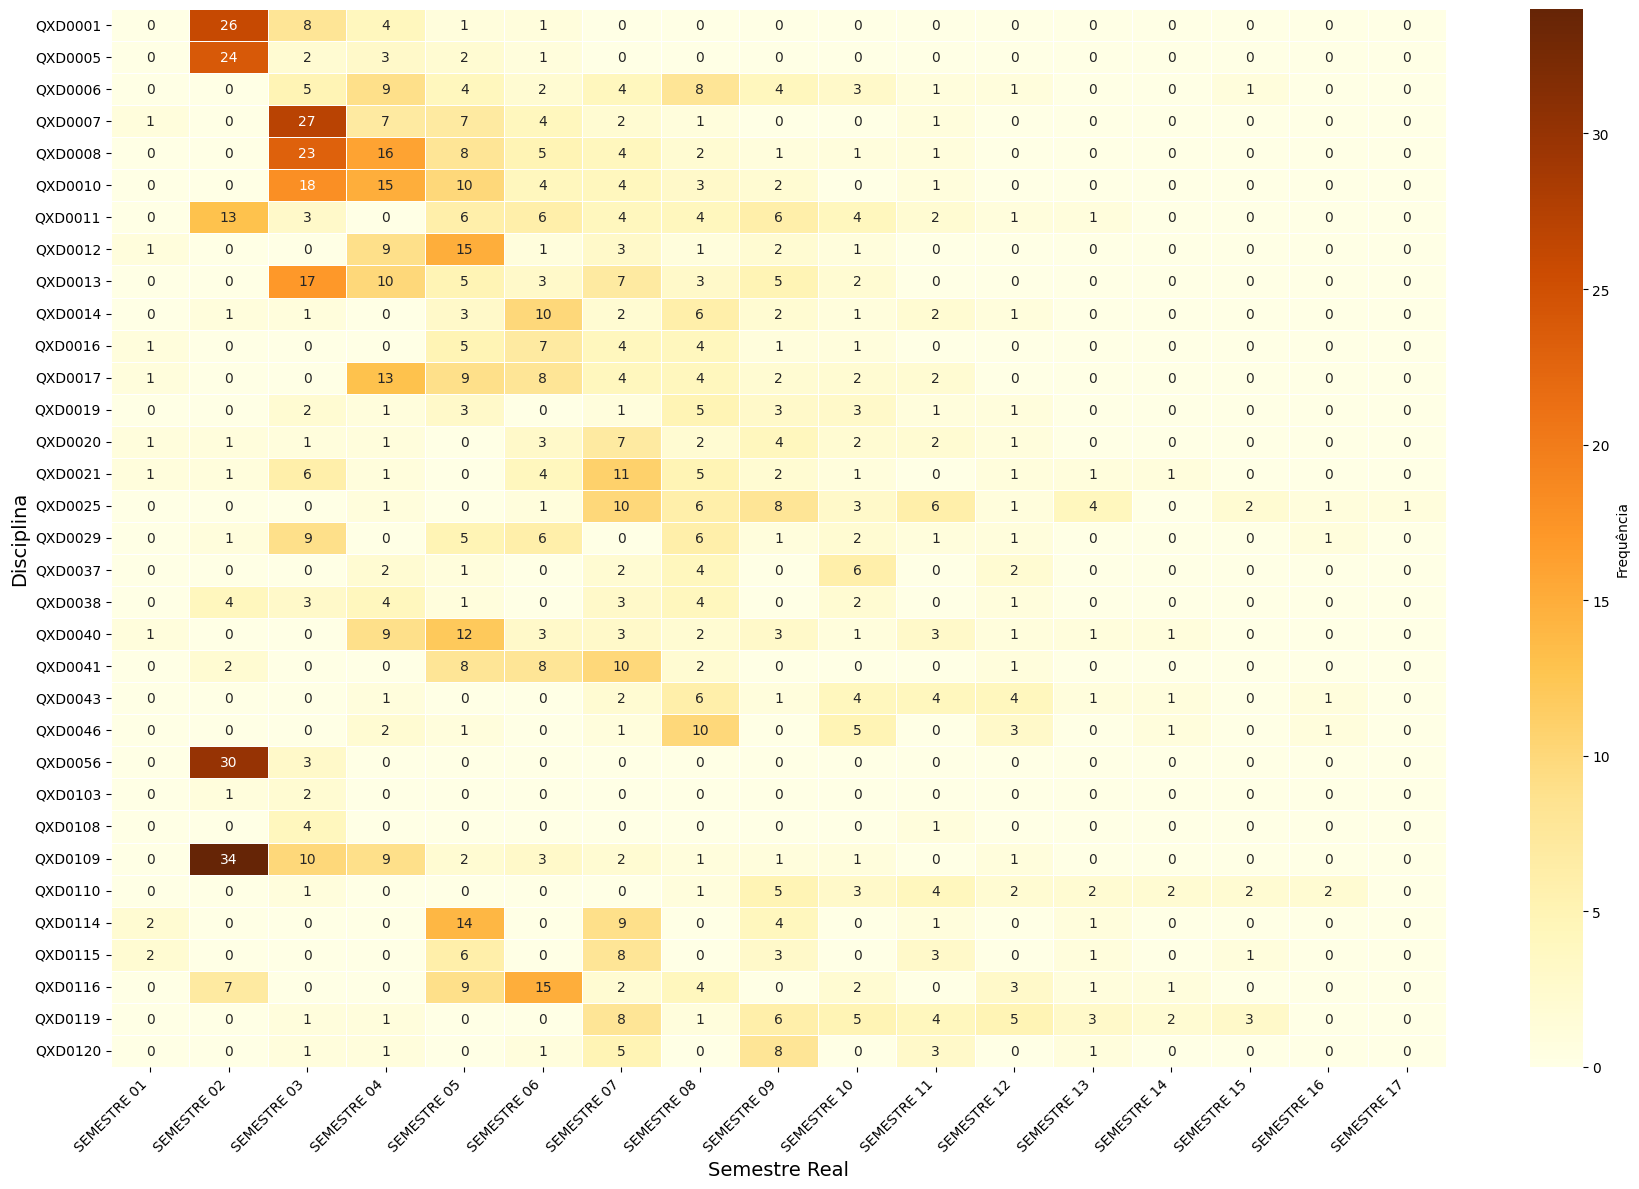

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar nova tabela de frequência por disciplina e semestre real
heatmap_data = df_fora_ordem_corrigido.groupby(["Disciplina", "Semestre Real"]).size().unstack(fill_value=0)

# Plotar o gráfico de calor
plt.figure(figsize=(18, 12))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrBr", linewidths=0.5, cbar_kws={"label": "Frequência"})
#plt.title("Frequência de Disciplinas Fora de Ordem por Semestre Real", fontsize=16)
plt.xlabel("Semestre Real", fontsize=14)
plt.ylabel("Disciplina", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#pdf_path = "heatmap_disciplinas_fora_ordem.pdf"
#plt.savefig(pdf_path, format="pdf", dpi=300)
#plt.savefig(pdf_path)
#plt.savefig(png_path, dpi=300)


plt.show()

#pdf_path

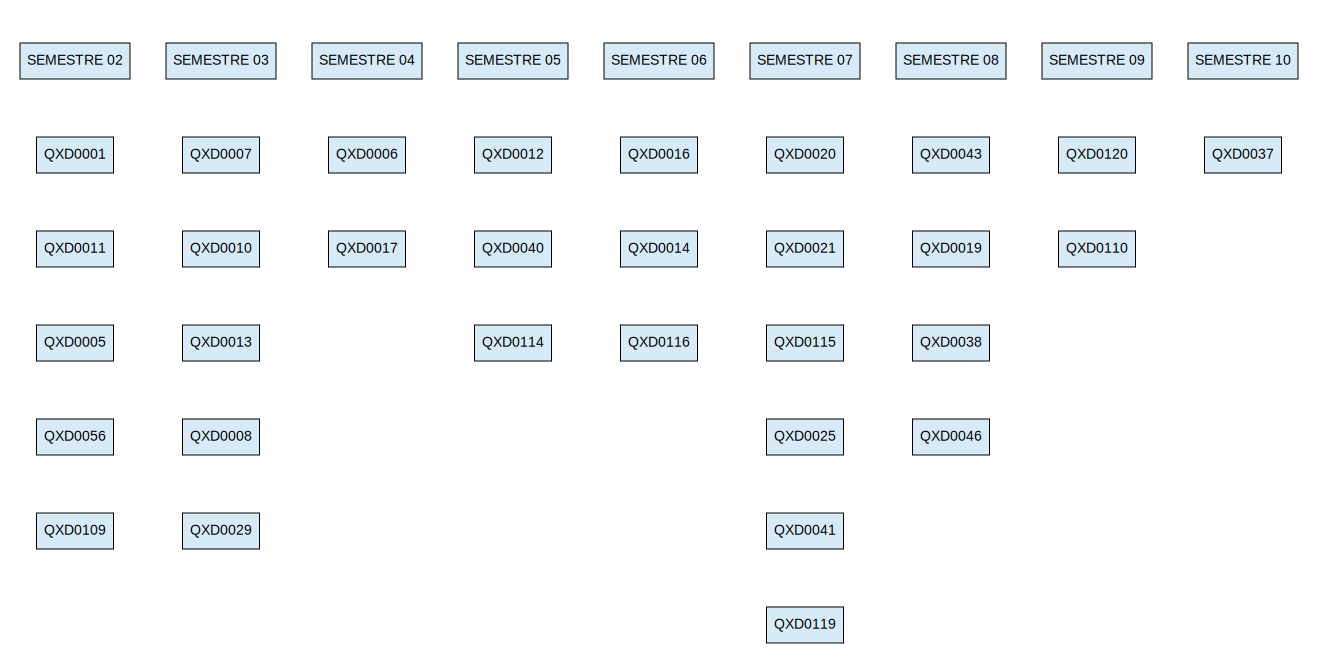

In [ ]:
from graphviz import Digraph

# Criar o grafo
dot = Digraph(format='png')
dot.attr(splines="ortho", rankdir='LR', nodesep="0.8")
dot.node_attr.update(shape="box", fontname="Helvetica,Arial,sans-serif")
dot.edge_attr.update(fontname="Helvetica,Arial,sans-serif")

# Dicionário com os semestres e disciplinas
semestres = {
    "SEMESTRE 02": ["SEMESTRE 02", "QXD0001", "QXD0011", "QXD0005", "QXD0056", "QXD0109"],
    "SEMESTRE 03": ["SEMESTRE 03", "QXD0007", "QXD0010", "QXD0013", "QXD0008", "QXD0029"],
    "SEMESTRE 04": ["SEMESTRE 04", "QXD0006", "QXD0017"],
    "SEMESTRE 05": ["SEMESTRE 05", "QXD0012", "QXD0040", "QXD0114"],
    "SEMESTRE 06": ["SEMESTRE 06", "QXD0016", "QXD0014", "QXD0116"],
    "SEMESTRE 07": ["SEMESTRE 07", "QXD0020", "QXD0021", "QXD0115", "QXD0025", "QXD0041", "QXD0119"],
    "SEMESTRE 08": ["SEMESTRE 08", "QXD0043", "QXD0019", "QXD0038", "QXD0046"],
    "SEMESTRE 09": ["SEMESTRE 09", "QXD0120", "QXD0110"],
    "SEMESTRE 10": ["SEMESTRE 10", "QXD0037"]
}

# Criar subgrafos (clusters) por semestre
for i, (semestre, disciplinas) in enumerate(semestres.items()):
    with dot.subgraph(name=f'cluster_{i}') as s:
        s.attr(style='filled', color='white', fontcolor='white', label=semestre)
        s.graph_attr['rank'] = 'same'
        for disciplina in disciplinas:
            s.node(disciplina, style='filled', fillcolor='#D6EAF8', fontcolor='black')

# Alinhar os semestres com arestas invisíveis
semestres_lista = list(semestres.values())
for i in range(len(semestres_lista) - 1):
    dot.edge(semestres_lista[i][0], semestres_lista[i + 1][0], style="invis", weight="100")

# Exibir o grafo
dot
